In [1]:
# !pip install kagglehub
#!pip install sidetable

## 1. Importing Libraries

In [2]:
import kagglehub
import pandas as pd

import seaborn as sns

import os
import matplotlib.pyplot as plt

import numpy as np
import sidetable

In [3]:
%matplotlib inline 

In [4]:
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

## 2. Data
Data Columns Means
<ul>
<li>Age--------------> Age of customer(Old/Middle/Young)</li>
<li>Gender -------------->Gender (Male/ Female)</li>
<li>OwnHome -------------->Whether customer owns home (Own/Rent)</li>
<li>Married ------------> Married (Müşteri Evli plup olmadığı)(single/married)</li> 
<li>Location -------------> In terms of distance to the nearest brick and mortar store that sells similar products(Far/ Close)</li>
<li>Salary --------->Yearly salary of customer in dollars</li>
<li>Children ------->Number of children (0-3)</li>
<li>History -----> History of previous purchase volume (low/medium/high/NA NA means that this customer has not yet purchased)</li>
<li>Catalogs ----------->Number of catalogs sent</li>
<li>AmountSpent ------> Amount Spent in dollars</li>
</ul>

In [5]:
# Download latest version
path = kagglehub.dataset_download("yoghurtpatil/direct-marketing")
print("Path to dataset files:", path)


Path to dataset files: C:\Users\40101410\.cache\kagglehub\datasets\yoghurtpatil\direct-marketing\versions\1


In [6]:
# print working directory
cwd = os.getcwd()
cwd

'C:\\Users\\40101410\\OneDrive - Anheuser-Busch InBev\\Upskill2024'

[]

In [10]:
source = path
destination = 'C://Users//40101410//OneDrive - Anheuser-Busch InBev//Upskill2024//Data'
allfiles = os.listdir(source)
# iterate on all files to move them to destination folder
for f in allfiles:
    src_path = os.path.join(source, f)
    dst_path = os.path.join(destination, f)
    os.rename(src_path, dst_path)

In [11]:
# print working directory
cwd = os.getcwd()
cwd
os.listdir()

['.ipynb_checkpoints', 'Data', 'direct-marketing-eda.ipynb', 'Pre-processing']

In [12]:
csv_path = os.path.join(cwd, 'Data\\DirectMarketing' + '.' + 'csv')
csv_path 

'C:\\Users\\40101410\\OneDrive - Anheuser-Busch InBev\\Upskill2024\\Data\\DirectMarketing.csv'

In [13]:
def read_data_from_csv(csv_path):
    """Reads data from a csv file.
    
        Arg:
         csv_path: The path to the csv file.
        
        Returns:
         A pandas DataFrame, or None or error     
    """
    try:
        df = pd.read_csv(csv_path)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing CSV. check the file format")
        return None
    except Exception as e:
        print(f"An unexpected error occured {e}")
        return None
    

df = read_data_from_csv(csv_path) 
    
    

## 3. EDA

In [14]:
# check the number of rows and columns in data
nrow , ncol = df.shape
nrow , ncol

(1000, 10)

In [15]:
# find missing values in each column
df.stb.missing()

,missing,total,percent
History,303,1000,30.3
Age,0,1000,0.0
Gender,0,1000,0.0
OwnHome,0,1000,0.0
Married,0,1000,0.0
Location,0,1000,0.0
Salary,0,1000,0.0
Children,0,1000,0.0
Catalogs,0,1000,0.0
AmountSpent,0,1000,0.0


Missing values in history column only

In [16]:
# name of the columns with there characteristics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          1000 non-null   object
 1   Gender       1000 non-null   object
 2   OwnHome      1000 non-null   object
 3   Married      1000 non-null   object
 4   Location     1000 non-null   object
 5   Salary       1000 non-null   int64 
 6   Children     1000 non-null   int64 
 7   History      697 non-null    object
 8   Catalogs     1000 non-null   int64 
 9   AmountSpent  1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [17]:
# Duplicated data
df[df.duplicated() == True]

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent


### Categorical Variables

In [18]:
categorical_variables  = df.select_dtypes(include=['object']).columns
categorical_variables

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'History'], dtype='object')

In [19]:
# Unique Value
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Age': ['Old', 'Middle', 'Young'],
 'Gender': ['Female', 'Male'],
 'OwnHome': ['Own', 'Rent'],
 'Married': ['Single', 'Married'],
 'Location': ['Far', 'Close'],
 'History': ['High', 'Low', 'Medium', nan]}

Age
Middle    50.8
Young     28.7
Old       20.5
Name: Age, dtype: float64 



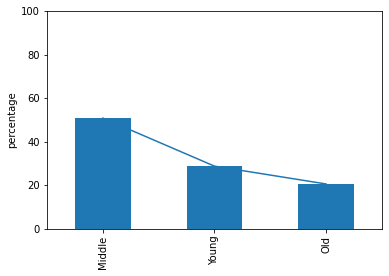

Gender
Female    50.6
Male      49.4
Name: Gender, dtype: float64 



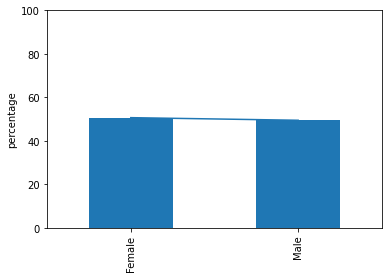

OwnHome
Own     51.6
Rent    48.4
Name: OwnHome, dtype: float64 



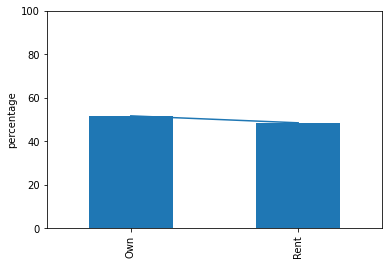

Married
Married    50.2
Single     49.8
Name: Married, dtype: float64 



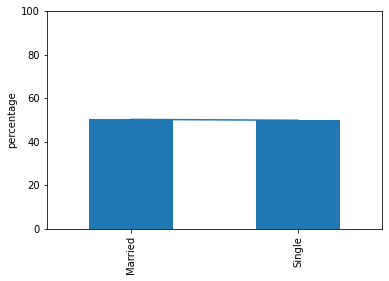

Location
Close    71.0
Far      29.0
Name: Location, dtype: float64 



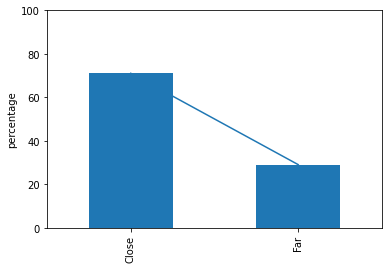

History
High      36.6
Low       33.0
Medium    30.4
Name: History, dtype: float64 



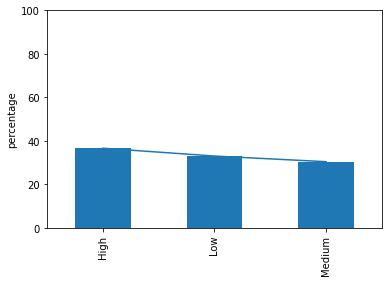

In [20]:
# print percentage of values of count of unique values for all categorical variables
for var in categorical_variables:
    print(f"\033[1m{var}\033[0m")
    var_count_dist = round(df[var].value_counts(normalize = True) * 100,1)
    print(var_count_dist, '\n')
    fig,ax = plt.subplots()
    var_count_dist.plot()
    var_count_dist.plot(ax = ax, kind = 'bar', ylabel = 'percentage', ylim = ([0,100]))
    plt.show()

Summary 

1. Most of the people are in middle ages
2. Equal representation across genders, home owners and marital status
3. More people live close to the store

#### Numeric Variables

In [29]:
numeric_variables = df.select_dtypes(include=['int64']).columns
numeric_variables

Index(['Salary', 'Children', 'Catalogs', 'AmountSpent'], dtype='object')

In [184]:
# Data summary
round(df.describe(),0).T

,count,mean,std,min,25%,50%,75%,max
Salary,1000.0,56104.0,30616.0,10100.0,29975.0,53700.0,77025.0,168800.0
Children,1000.0,1.0,1.0,0.0,0.0,1.0,2.0,3.0
Catalogs,1000.0,15.0,7.0,6.0,6.0,12.0,18.0,24.0
AmountSpent,1000.0,1217.0,961.0,38.0,488.0,962.0,1688.0,6217.0


In [180]:
print("\\033[1m Correlation Matrix\\033[0m")
round(df.corr(),2)

\033 Correlation Matrix\033


,Salary,Children,Catalogs,AmountSpent
Salary,1.00,0.05,0.18,0.70
Children,0.05,1.00,-0.11,-0.22
Catalogs,0.18,-0.11,1.00,0.47
AmountSpent,0.70,-0.22,0.47,1.00


<AxesSubplot:>

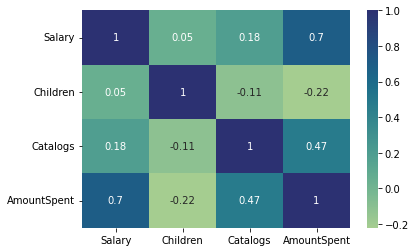

In [173]:
sns.heatmap(df.corr(), cmap = "crest")

In [39]:
type(numeric_variables)


pandas.core.indexes.base.Index

In [100]:
cat_var = 'Age'

In [103]:
# sns.boxplot(data = df, x = cat_var, y = numeric_variables)

In [101]:
#### Check which categories spend more amount that others
def relation_variable(cat_var, cts_var):
    """
    See how continuous variables like amount spent, salary, etc. changes with age, gender, and other categorical variables
    
    Arg:
    cts_var : Continuous Vaiable
    cat_var: Categroical Variable
    """
    
    avg = df.groupby(by = cat_var)[cts_var].mean().round(1).reset_index()
    avg = avg.rename(columns={c: 'avg_' + c for c in avg.columns if c != cat_var})
    print(avg)

In [102]:
for cat_var in categorical_variables:
    print(f"\033[1m{cat_var}\033[0m")
    relation_variable(cat_var, numeric_variables)

Age
      Age  avg_Salary  avg_Children  avg_Catalogs  avg_AmountSpent
0  Middle     72036.4           1.2          15.4           1501.7
1     Old     56365.9           0.1          15.2           1432.1
2   Young     27715.7           1.1          13.0            558.6
Gender
   Gender  avg_Salary  avg_Children  avg_Catalogs  avg_AmountSpent
0  Female     48197.4           1.0          14.1           1025.3
1    Male     64202.4           0.8          15.3           1412.9
OwnHome
  OwnHome  avg_Salary  avg_Children  avg_Catalogs  avg_AmountSpent
0     Own     69758.7           0.9          15.3           1543.1
1    Rent     41546.3           1.0          14.0            868.8
Married
   Married  avg_Salary  avg_Children  avg_Catalogs  avg_AmountSpent
0  Married     76696.4           0.9          15.6           1672.1
1   Single     35346.0           0.9          13.8            757.8
Location
  Location  avg_Salary  avg_Children  avg_Catalogs  avg_AmountSpent
0    Close     56830.0

Summary 
1. Middle income earns and spends more
2. Male earn ans spends more
3. Consumers who own a house, earn and spend more
4. Consumers who are close by earn more but people who come from far, spend more
5. Consumers who have bought higher volume in past earn more than other groups